In [2]:
using Convex
using PyPlot

In [43]:
n = 100
X = randn(n, n)
eigs = randn(n)
A = diagm(eigs)
b = randn(n);
x = Variable(n)
X = Semidefinite(n)
constraints = [ trace(X) <= 1, ([X x; x' 1] ⪰ 0)]
problem = minimize(trace(A*X) + 2*b'*x, constraints)
solve!(problem);
f_star = problem.optval/2 # your value from CVX goes here 

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Int64}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SDPConstraint, ::Convex.UniqueConicForms) at /Users/rpathak/.julia/v0.6/Convex/src/constraints/sdp_constraints.jl:52
 [4] conic_form!(::Symbol, ::Convex.Variable, ::Convex.UniqueConicForms) at /Users/rpathak/.julia/v0.6/Convex/src/constraints/signs_and_sets.jl:11
 [5] conic_form!(::Convex.Variable, ::Convex.UniqueConicForms) at /Users/rpathak/.julia/v0.6/Convex/src/variable.jl:111
 [6] conic_form!(::Convex.MultiplyAtom, ::Convex.UniqueConicForms) at /Users/rpathak/.julia/v0.6/Convex/src/atoms/affine/multiply_divide.jl:85
 [7] conic_form!(::Convex.DiagAtom, ::Convex.UniqueConicForms) at /Users/rpathak/.julia/v0.6/Convex/src/atoms/affine/diag.jl:92
 [8] conic_form!(::Convex.SumAtom, ::Convex.UniqueConicForms) at /Users/rpathak/.julia/v0.6/Convex/src/atoms/affine/sum.jl:48
 [9] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 30301
eps = 1.00e-04, alpha = 1.80, max_iters = 20000, normalize = 1, scale = 5.00
Variables n = 10101, constraints m = 20203
Cones:	primal zero / dual free vars: 10001
	linear vars: 1
	sd vars: 10201, sd blks: 2
Setup time: 7.64e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf      -inf       inf  3.95e-03 
   100| 1.51e-05  1.22e-05  8.97e-08 -1.89e+01 -1.89e+01  0.00e+00  7.52e-01 
----------------------------------------------------------------------------
Status: Solved
Timi

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] isnan(::Array{Float64,1}) at ./deprecated.jl:57
 [3] populate_solution!(::SCS.SCSMathProgModel, ::Convex.Problem, ::Dict{UInt64,Tuple{Int64,Int64}}, ::Array{Convex.ConicConstr,1}) at /Users/rpathak/.julia/v0.6/Convex/src/solution.jl:118
 [4] #solve!#25(::Bool, ::Bool, ::Bool, ::Function, ::Convex.Problem) at /Users/rpathak/.julia/v0.6/Convex/src/solution.jl:38
 [5] solve!(::Convex.Problem) at /Users/rpathak/.julia/v0.6/Convex/src/solution.jl:21
 [6] include_string(::String, ::String) at ./loading.jl:522
 [7] include_string(::Module, ::String, ::String) at /Users/rpathak/.julia/v0.6/Compat/src/Compat.jl:71
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/rpathak/.julia/v0.6/IJulia/src/execute_request.jl:158
 [9] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/rpathak/.julia/v0.6/Compat/src/Compat.jl:385
 [10] eventloop(::ZMQ.Socket) at /Users/rpathak/.jul

-9.451375574921203

In [44]:
x = randn(n)
x = x / norm(x)
f(x) = 0.5 * dot(x, A*x) + dot(b, x)
grad(x) = A*x + b
fs = [f(x)]
for k in 1:3000
	x -= 0.1 * grad(x)
	if norm(x) > 1
		x /= norm(x)
	end
	push!(fs, f(x) - f_star)
end

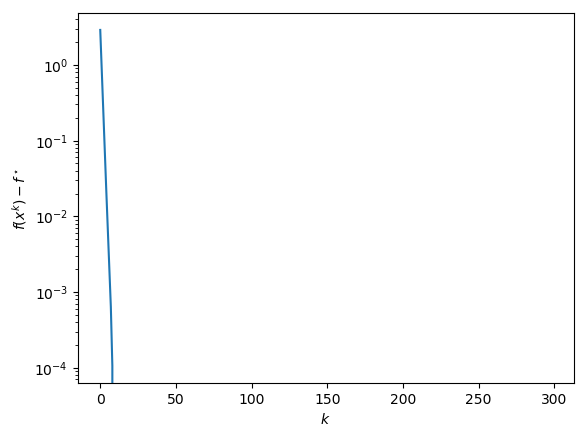

In [46]:
semilogy(fs[2:300])
xlabel(L"$k$")
ylabel(L"$f(x^k) - f^\star$")
savefig("output.png", bbox_inches="tight", dpi=1000)